# Vectorizarion of a matrix


There exists an operation to convert the above equation to a more solvable form 

$$
V = AU \\
$$

Following the procedure in the paper, we get:

$$
\operatorname{vech}(A) = ((U^\mathrm{T} \otimes I_{N\times N}) D_{N})^{\dagger} \operatorname{vec}(V) \\
\implies \operatorname{vec}(A) = D_{N}* \operatorname{vech}(A) 
$$

In [ ]:
class Some_Matrices():
    
    def vec(A):
        return A.flatten('F')

    def E_Matrices(n):
        I = eye(n)
        E = {(i,j):dot(I[:,i].reshape(n,1),I[:,j].T.reshape(1,n)) for i in range(n) for j in range(n)}
        return E

    def T_Matrices(n):
        E_inst = Some_Matrices.E_Matrices(n)
        T = {(i,j): (E_inst[(i,j)] if i == j else E_inst[(i,j)] + E_inst[(j,i)]) for i in range(n) for j in range(n)}
        return T 
    
    def u_vecs(n):
        I_nh = eye(n*(n+1)//2)
        u = {(i,j): I_nh[:, int((j)*n + (i+1) - 0.5*(j+1)*j -1)] for i in range(n) for j in range(n)}
        return u 
    
    def D_Matrix(n):
        num = n*(n+1)//2
        DT = zeros((num,n**2))
        T_inst = Some_Matrices.T_Matrices(n)
        u_inst = Some_Matrices.u_vecs(n)

        for j in range(n):
            for i in range(j,n):
                DT = DT + ((u_inst[(i,j)]).reshape(num,1)).dot(((Some_Matrices.vec(T_inst[(i,j)])).T).reshape(1,n**2))
        D = DT.T
        return D
    
    def make_mat(c,n):
        fullc = zeros((n,n))
        for i in range(n):
            fullc[:,i] = c[i:i+n]
        return fullc

In [ ]:
v = V.flatten('F')

In [ ]:
D = Some_Matrices.D_Matrix(N)
hA = pinv((kron(U.T,eye(N))).dot(D)).dot(v)
vec_A_gt = Some_Matrices.vec(A_gt)
fullA = D.dot(hA)

In [ ]:
ff = Some_Matrices.make_mat(fullA,N)

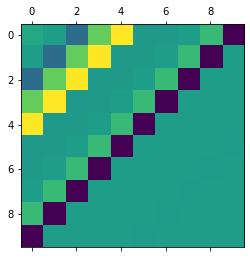

In [ ]:
matshow(ff)